In [376]:
import pandas as pd
import matplotlib.pyplot as plt


In [377]:
df1 = pd.read_csv('Scooter.csv')

In [378]:
df = df1.copy()


In [379]:
df['PollTime'] = pd.to_datetime(df['PollTime'])

In [380]:
df['Month'] = df['PollTime'].dt.month

In [381]:
df['Day'] = df['PollTime'].dt.day_name()

In [382]:
df['HOUR'] = df['PollTime'].dt.hour

In [383]:
df

,PollTime,CompanyName,NumberAvailable,ClosestCenterlineID,ClosestCenterlineType,Neighborhood,ESRI_OID,Month,Day,HOUR
0,2019-05-16 19:00:00+00:00,Lime,1,10122.00,street,Webber - Camden,1,5,Thursday,19
1,2019-05-16 19:00:00+00:00,Lime,1,10464.00,street,Lind - Bohanon,2,5,Thursday,19
2,2019-05-16 19:00:00+00:00,Lime,1,10801.00,street,Audubon Park,3,5,Thursday,19
3,2019-05-16 19:00:00+00:00,Lime,1,11395.00,street,CARAG,4,5,Thursday,19
4,2019-05-16 19:00:00+00:00,Lime,1,13067.00,street,Minnehaha,5,5,Thursday,19
...,...,...,...,...,...,...,...,...,...,...
486373,2019-10-18 23:00:00+00:00,Spin,1,22537.00,street,Steven's Square - Loring Heights,486374,10,Friday,23
486374,2019-10-18 23:00:00+00:00,Spin,1,26073.00,street,Prospect Park - East River Road,486375,10,Friday,23
486375,2019-10-18 23:00:00+00:00,Spin,1,8554BB01-327E-441D-8AFB-7DBBA502E527,trail,University of Minnesota,486376,10,Friday,23
486376,2019-10-18 23:00:00+00:00,Spin,1,A0695CAB-5306-420E-93C8-E4BDBC6FC107,trail,Ericsson,486377,10,Friday,23


In [384]:
df['CAT_HOUR'] = pd.cut(df['HOUR'], 
       bins=[0, 6, 12, 18, 24], 
       labels=['Overnight', 'Morning', 'Afternoon', 'Evening'])


In [385]:
df = df[['CompanyName', 'NumberAvailable',
       'ClosestCenterlineType', 'Neighborhood', 'Month', 'Day', 'HOUR',
       'CAT_HOUR']]


In [386]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486378 entries, 0 to 486377
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CompanyName            486378 non-null  object  
 1   NumberAvailable        486378 non-null  int64   
 2   ClosestCenterlineType  486378 non-null  object  
 3   Neighborhood           486378 non-null  object  
 4   Month                  486378 non-null  int32   
 5   Day                    486378 non-null  object  
 6   HOUR                   486378 non-null  int32   
 7   CAT_HOUR               486378 non-null  category
dtypes: category(1), int32(2), int64(1), object(4)
memory usage: 22.7+ MB


CompanyName              0
NumberAvailable          0
ClosestCenterlineType    0
Neighborhood             0
Month                    0
Day                      0
HOUR                     0
CAT_HOUR                 0
dtype: int64

<Axes: xlabel='CompanyName'>

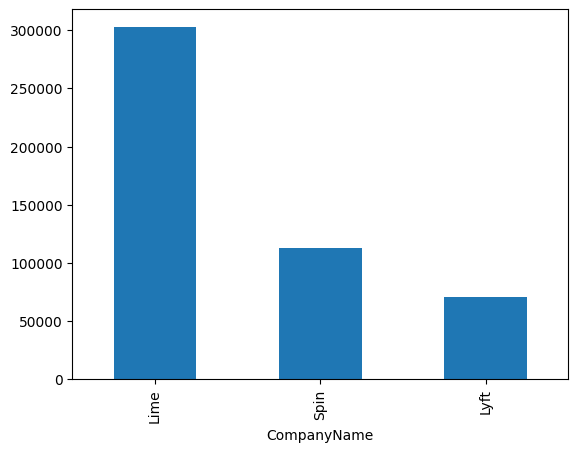

In [387]:
df['CompanyName'].value_counts().plot(kind = 'bar')

<Axes: xlabel='CompanyName'>

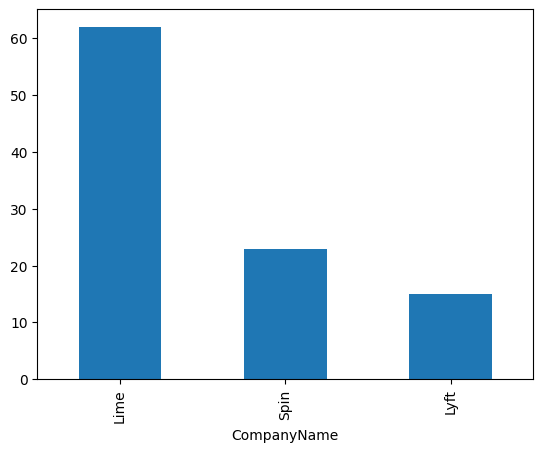

In [388]:
(df['CompanyName'].value_counts()/ len(df) * 100).round().plot(kind = 'bar')

<Axes: xlabel='Neighborhood'>

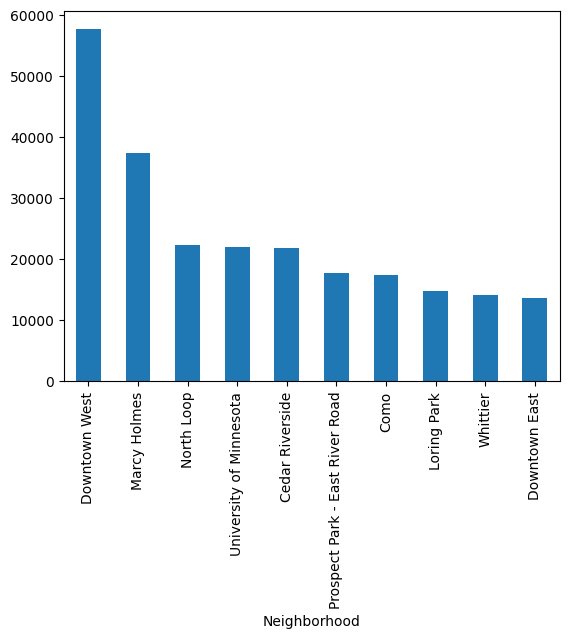

In [389]:
df['Neighborhood'].value_counts().head(10).plot(kind = 'bar')

In [390]:
df.groupby('HOUR')['NumberAvailable'].sum().sort_values(ascending = False)

HOUR
15    195998
11    184027
19    169902
7     124726
23    107511
3      61667
Name: NumberAvailable, dtype: int64

<Axes: xlabel='Day'>

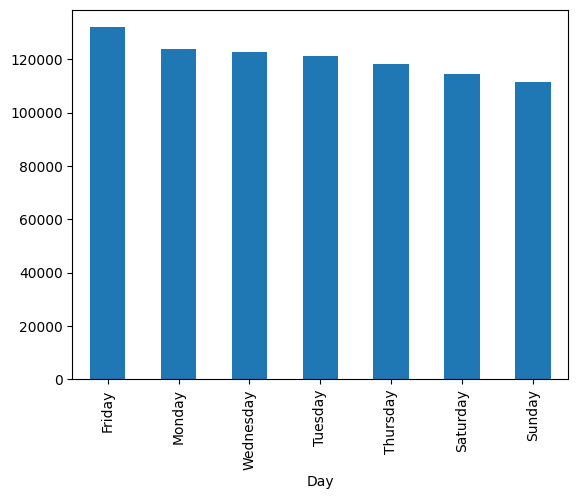

In [391]:
df.groupby('Day')['NumberAvailable'].sum().sort_values(ascending = False).plot(kind ='bar')

<Axes: xlabel='CompanyName'>

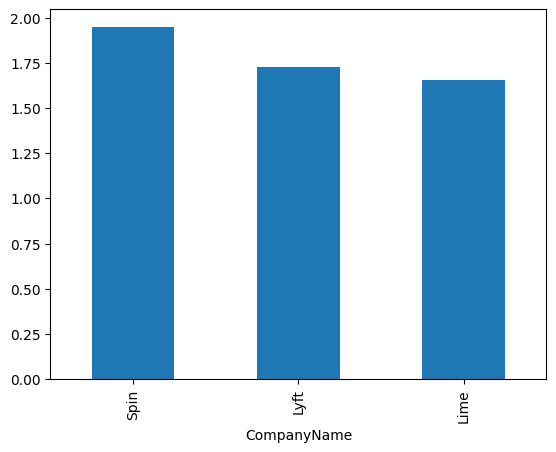

In [392]:
df.groupby('CompanyName')['NumberAvailable'].mean().sort_values(ascending = False).plot(kind ='bar')

In [393]:
df.groupby('CompanyName')['Neighborhood'].value_counts()

CompanyName  Neighborhood            
Lime         Downtown West               40753
             Marcy Holmes                25861
             Cedar Riverside             14778
             North Loop                  14538
             Como                        12879
                                         ...  
Spin         Bancroft                       40
             Kenny                          37
             Page                           30
             Shingle Creek                  30
             Humboldt Industrial Area       10
Name: count, Length: 261, dtype: int64

In [394]:
df.groupby('CompanyName')['HOUR'].value_counts().groupby('CompanyName').tail(3)
df.groupby('CompanyName')['HOUR'].value_counts().groupby('CompanyName').head(3)

CompanyName  HOUR
Lime         19      65029
             15      63967
             11      51285
Lyft         15      20493
             11      16384
             19      14313
Spin         19      31248
             15      29222
             11      20643
Name: count, dtype: int64

In [395]:
df.groupby('CompanyName')[['Neighborhood','HOUR' ]].value_counts().groupby('CompanyName').head(4)

CompanyName  Neighborhood             HOUR
Lime         Downtown West            11      11088
                                      15      10466
                                      7        6589
             Marcy Holmes             19       6037
Lyft         Downtown West            15       2731
                                      11       2687
                                      19        862
             North Loop               15        840
Spin         Downtown West            15       3225
             Marcy Holmes             19       3112
             University of Minnesota  15       2800
             Downtown West            11       2319
Name: count, dtype: int64

In [396]:
df.groupby('CompanyName')['NumberAvailable'].count()

CompanyName
Lime    302746
Lyft     70811
Spin    112821
Name: NumberAvailable, dtype: int64

In [397]:
(df['Neighborhood'] == 'Downtown West').sum()

57634

In [398]:
df['Neighborhood'].count() - (df['Neighborhood'] == 'Downtown West').sum() 

428744

In [399]:
# df = df[['CompanyName', 'NumberAvailable',
#        'ClosestCenterlineType', 'Neighborhood', 'Month', 'HOUR',
#        'CAT_HOUR']]


In [400]:
df.groupby('Neighborhood')['NumberAvailable'].max().sort_values(ascending = False)

Neighborhood
Harrison                           175
Cedar - Isles - Dean                44
St. Anthony West                    42
Downtown West                       35
Prospect Park - East River Road     35
                                  ... 
Lind - Bohanon                       4
Armatage                             4
Windom                               3
Morris Park                          2
Kenny                                2
Name: NumberAvailable, Length: 87, dtype: int64

In [401]:
df.loc[df['NumberAvailable'] == 175]

,CompanyName,NumberAvailable,ClosestCenterlineType,Neighborhood,Month,Day,HOUR,CAT_HOUR
56154,Spin,175,street,Harrison,6,Saturday,15,Afternoon


In [402]:
df.loc[df['Neighborhood'] == 'Harrison']

,CompanyName,NumberAvailable,ClosestCenterlineType,Neighborhood,Month,Day,HOUR,CAT_HOUR
51,Lime,1,street,Harrison,5,Thursday,19,Evening
53,Lime,1,street,Harrison,5,Thursday,19,Evening
66,Lime,1,street,Harrison,5,Thursday,19,Evening
93,Lime,1,street,Harrison,5,Thursday,19,Evening
96,Lime,5,trail,Harrison,5,Thursday,19,Evening
...,...,...,...,...,...,...,...,...
485822,Lime,1,street,Harrison,10,Friday,23,Evening
485879,Lyft,1,street,Harrison,10,Friday,23,Evening
486193,Spin,1,street,Harrison,10,Friday,23,Evening
486238,Spin,1,street,Harrison,10,Friday,23,Evening


In [403]:
df

,CompanyName,NumberAvailable,ClosestCenterlineType,Neighborhood,Month,Day,HOUR,CAT_HOUR
0,Lime,1,street,Webber - Camden,5,Thursday,19,Evening
1,Lime,1,street,Lind - Bohanon,5,Thursday,19,Evening
2,Lime,1,street,Audubon Park,5,Thursday,19,Evening
3,Lime,1,street,CARAG,5,Thursday,19,Evening
4,Lime,1,street,Minnehaha,5,Thursday,19,Evening
...,...,...,...,...,...,...,...,...
486373,Spin,1,street,Steven's Square - Loring Heights,10,Friday,23,Evening
486374,Spin,1,street,Prospect Park - East River Road,10,Friday,23,Evening
486375,Spin,1,trail,University of Minnesota,10,Friday,23,Evening
486376,Spin,1,trail,Ericsson,10,Friday,23,Evening
